In [1]:
# basics
import pandas as pd 
import numpy as np
import os 
import re
from datetime import datetime
from tqdm.notebook import tqdm
tqdm.pandas()
import requests
import urllib

# plotting
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)

In [2]:
# local or gdrive
path_source = 'local2'

if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  data_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  data_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

elif path_source == 'local2':
  data_path = '/data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

In [3]:
  
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
   
current_path()
   
os.chdir('../')
   
current_path()

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project\modeling

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project



In [4]:
os.getcwd()

'c:\\Users\\anandadmin\\Documents\\ML_MS\\UCB\\2022_Fall\\W210\\JLPS_capstone_project'

In [5]:
# load full dataset
df = pd.read_parquet('data\joined_data\joined_open_schools_only_10-10-22.parquet')

In [6]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2892.9075458251764,11.831222108044384,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2004.5665433091058,-57.72695665034661,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [7]:
df.shape

(2471552, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471552 entries, 0 to 2983110
Data columns (total 56 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   year                       float64       
 1   cdscode                    int64         
 2   school_county              object        
 3   school_zip                 int32         
 4   school_open_date           datetime64[ns]
 5   school_closed_date         datetime64[ns]
 6   school_lat                 float64       
 7   school_lon                 float64       
 8   school_wspd                float64       
 9   school_elevation_m         float64       
 10  year_month                 datetime64[ns]
 11  total_population           object        
 12  total_population_male      object        
 13  total_population_female    object        
 14  population_0_4             object        
 15  population_0_4_male        object        
 16  population_0_4_female      object   

In [9]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2892.9075458251764,11.831222108044384,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2004.5665433091058,-57.72695665034661,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [10]:
df.open_dates_valid.value_counts()

1    2471552
Name: open_dates_valid, dtype: int64

# Data Clean

Clean the dates:
- For schools that don't have open/close dates, just assume the school was always open by setting early/late dates. 
- Then use the school open/closed dates and filter out schools that were closed. 

In [11]:
df.head(3)

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.26487,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1


In [12]:
# fix some datatypes
num_vars = ['angle_to_school', 'ps_elevation_m', 'pm25', 'point_source_pm25_tpy', 
            'dist_school_to_ps_m', 'angle_to_school', 'avg_wind_alignment_cosine',
            'total_population', 'total_population_male', 'total_population_female', 
            'population_0_4', 'population_0_4_male', 'population_0_4_female',
            'population_5_9', 'population_5_9_male', 'population_5_9_female',
            'population_10_14', 'population_10_14_male', 'population_10_14_female',
            'population_15_19', 'population_15_19_male', 'population_15_19_female',
            'total_pop_under19']

for var in num_vars:
  df[var] = df[var].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471552 entries, 0 to 2983110
Data columns (total 56 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   year                       float64       
 1   cdscode                    int64         
 2   school_county              object        
 3   school_zip                 int32         
 4   school_open_date           datetime64[ns]
 5   school_closed_date         datetime64[ns]
 6   school_lat                 float64       
 7   school_lon                 float64       
 8   school_wspd                float64       
 9   school_elevation_m         float64       
 10  year_month                 datetime64[ns]
 11  total_population           float64       
 12  total_population_male      float64       
 13  total_population_female    float64       
 14  population_0_4             float64       
 15  population_0_4_male        float64       
 16  population_0_4_female      float64  

In [14]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2358.382419,-37.540285,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2892.907546,11.831222,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2004.566543,-57.726957,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [15]:
df.shape

(2471552, 56)

### Fill in NA's

- Missing `pm25`: drop rows
- Missing population from census: average for male, average for female, total = sum of averages for male/female
- Missing `CA_AGI_per_returns`: average across CA
- Missing `Total Tax Liability`: average across CA

In [16]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population               1584
total_population_male          1584
total_population_female        1584
population_0_4                 1584
population_0_4_male            1584
population_0_4_female          1584
population_5_9                 1584
population_5_9_male            1584
population_5_9_female          1584
population_10_14               1584
population_10_14_male          1584
population_10_14_female        1584
population_15_19               1584
population_15_19_male          1584
population_15_19_female        1584
pop_under19_male               1584
pop_under19_female          

In [17]:
# filter out na pm2.5 values
df = df[~df['pm25'].isna()]

# just mean impute missing populations
# df['population_0_4'] = df['population_0_4'].fillna(df['population_0_4'].mean())
# df['population_5_9'] = df['population_5_9'].fillna(df['population_5_9'].mean())
# df['population_10_14'] = df['population_10_14'].fillna(df['population_10_14'].mean())
# df['population_15_19'] = df['population_15_19'].fillna(df['population_15_19'].mean())
df['total_population_male'] = df['total_population_male'].fillna(df['total_population_male'].mean())
df['total_population_female'] = df['total_population_female'].fillna(df['total_population_female'].mean())
df['total_population'] = df['total_population'].fillna(df['total_population_male'] + df['total_population_female'])

df['population_0_4_male'] = df['population_0_4_male'].fillna(df['population_0_4_male'].mean())
df['population_0_4_female'] = df['population_0_4_female'].fillna(df['population_0_4_female'].mean())
df['population_0_4'] = df['population_0_4'].fillna(df['population_0_4_male'] + df['population_0_4_female'])

df['population_5_9_male'] = df['population_5_9_male'].fillna(df['population_5_9_male'].mean())
df['population_5_9_female'] = df['population_5_9_female'].fillna(df['population_5_9_female'].mean())
df['population_5_9'] = df['population_5_9'].fillna(df['population_5_9_male'] + df['population_5_9_female'])


df['population_10_14_male'] = df['population_10_14_male'].fillna(df['population_10_14_male'].mean())
df['population_10_14_female'] = df['population_10_14_female'].fillna(df['population_10_14_female'].mean())
df['population_10_14'] = df['population_10_14'].fillna(df['population_10_14_male'] + df['population_10_14_female'])

df['population_15_19_male'] = df['population_15_19_male'].fillna(df['population_15_19_male'].mean())
df['population_15_19_female'] = df['population_15_19_female'].fillna(df['population_15_19_female'].mean())
df['population_15_19'] = df['population_15_19'].fillna(df['population_15_19_male'] + df['population_15_19_female'])


# just mean impute missing populations
df['pop_under19_male'] = df['pop_under19_male'].fillna(df['pop_under19_male'].mean())
df['pop_under19_female'] = df['pop_under19_female'].fillna(df['pop_under19_female'].mean())
df['total_pop_under19'] = df['pop_under19_female'].fillna(df['pop_under19_female'] + df['pop_under19_male'])


# just mean impute missing agi and tax liability
df['CA_AGI_per_returns'] = df['CA_AGI_per_returns'].fillna(df['CA_AGI_per_returns'].mean())
df['Total Tax Liability'] = df['Total Tax Liability'].fillna(df['Total Tax Liability'].mean())


print(df.shape)

(2338291, 56)


In [18]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population                  0
total_population_male             0
total_population_female           0
population_0_4                    0
population_0_4_male               0
population_0_4_female             0
population_5_9                    0
population_5_9_male               0
population_5_9_female             0
population_10_14                  0
population_10_14_male             0
population_10_14_female           0
population_15_19                  0
population_15_19_male             0
population_15_19_female           0
pop_under19_male                  0
pop_under19_female          

<AxesSubplot: >

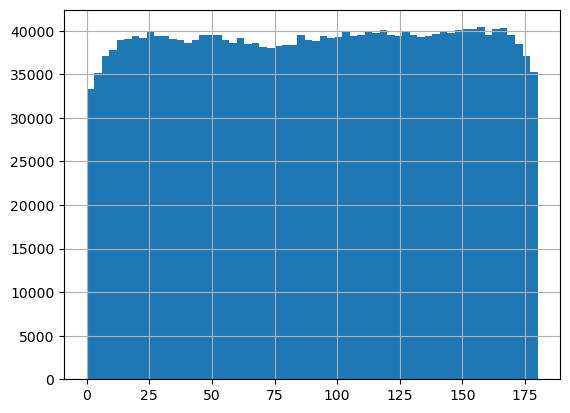

In [19]:
df.avg_wind_alignment.hist(bins=60)

<AxesSubplot: >

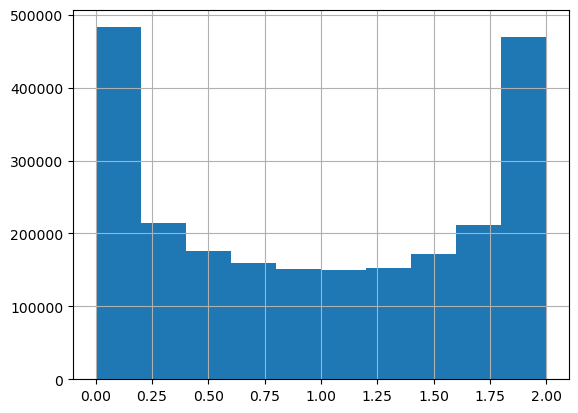

In [20]:
df.avg_wind_alignment_cosine.hist()

In [19]:
df.columns

Index(['year', 'cdscode', 'school_county', 'school_zip', 'school_open_date',
       'school_closed_date', 'school_lat', 'school_lon', 'school_wspd',
       'school_elevation_m', 'year_month', 'total_population',
       'total_population_male', 'total_population_female', 'population_0_4',
       'population_0_4_male', 'population_0_4_female', 'population_5_9',
       'population_5_9_male', 'population_5_9_female', 'population_10_14',
       'population_10_14_male', 'population_10_14_female', 'population_15_19',
       'population_15_19_male', 'population_15_19_female', 'pop_under19_male',
       'pop_under19_female', 'total_pop_under19', 'pm25', 'point_source_lat',
       'point_source_lon', 'ps_elevation_m', 'point_source_pm25_tpy',
       'dist_school_to_ps_m', 'angle_to_school', 'ps_wind_lat', 'ps_wind_lon',
       'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N',
       'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed',
       'avg_wind_alignment', 'avg_wind_alig

In [20]:
df.head(3)

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.26487,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,2358.382419,-37.540285,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1


In [24]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population                  0
total_population_male             0
total_population_female           0
population_0_4                    0
population_0_4_male               0
population_0_4_female             0
population_5_9                    0
population_5_9_male               0
population_5_9_female             0
population_10_14                  0
population_10_14_male             0
population_10_14_female           0
population_15_19                  0
population_15_19_male             0
population_15_19_female           0
pop_under19_male                  0
pop_under19_female          

In [21]:
min(df.year_month)

Timestamp('2000-01-01 00:00:00')

In [22]:
max(df.year_month)

Timestamp('2018-12-01 00:00:00')

# Aggregate data to zip/month level

Check row counts before we do a group by. Want everything on a year-month-zip basis. Some variables are already on this year-month-zip basis, others are not. Group by the vars that are on this year-month-zip basis, then average the others that aren't to fit this grouping.

In [23]:
n = df[['year_month', 'school_zip']].drop_duplicates().shape[0]
print(f'count of distinct year-mo-zips: {n}')

# including the population counts in this
n = df[['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
  'pop_under19_male', 'pop_under19_female', 'total_pop_under19', 'pm25', 
  'CA_AGI_per_returns', 'Total Tax Liability']]\
  .drop_duplicates().shape[0]
print(f'count of distinct for all join vars: {n}')

count of distinct year-mo-zips: 312789
count of distinct for all join vars: 312789


In [ ]:
# maybe not all of these should use 'mean', but doing it this way for now. 
mean_vars = ['school_wspd', 'school_elevation_m', 'ps_elevation_m', 'ps_elevation_m', 'point_source_pm25_tpy', 
  'dist_school_to_ps_m', 'angle_to_school', 'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N', 
  'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed', 'avg_wind_alignment', 'avg_wind_alignment_cosine',
  'nearby_point_source_count', 'CA_AGI_per_returns', 'Total Tax Liability']

mean_dict = {var:(var, 'mean') for var in mean_vars}
grp_vars = ['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
  'pop_under19_male', 'pop_under19_female', 'pm25']
# 'total_pop_under19'

df_grp = df\
  .groupby(grp_vars)\
  .agg(**mean_dict)\
  .reset_index()

print(f'Num rows of grouped df: {df_grp.shape[0]}')

In [13]:
# maybe not all of these should use 'mean', but doing it this way for now. 
mean_vars = ['school_wspd', 'school_elevation_m', 'ps_elevation_m', 'pop_under19_male', 
             'pop_under19_female', 'pm25', 'point_source_pm25_tpy', 'dist_school_to_ps_m', 
             'angle_to_school', 'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N', 
             'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed', 
             'avg_wind_alignment', 'avg_wind_alignment_cosine']
mean_dict = {var:(var, 'mean') for var in mean_vars}

df_grp = df\
  .groupby(['year_month', 'school_zip', 'school_county_v2', 'school_region_name', 'year'])\
  .agg(**mean_dict)\
  .reset_index()

df_grp.head(3)

,year_month_date,school_county,school_region_name,school_zip,school_wspd,school_elevation_m,ps_elevation_m,pop_under19_male,pop_under19_female,pm25,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine
0,2000-01-01,Alameda,San Francisco Bay Area,94501,1.006650,6.142667,3.793333,6855.0,6497.0,14.600000,5.258067,1717.410608,-33.389362,0.628877,63.227197,68.462249,140.776564,137.445167,0.817763,139.110866,0.337179
1,2000-01-01,Alameda,San Francisco Bay Area,94502,1.006650,4.655000,4.210000,1859.0,1845.0,14.880000,9.449277,3018.878458,-139.679287,0.491505,63.227197,70.365905,157.093516,149.954808,0.749077,153.524162,0.113934
2,2000-01-01,Alameda,San Francisco Bay Area,94514,0.720902,27.460000,315.130000,1487.0,1294.0,20.241379,153.132229,7501.370079,57.048970,0.724224,57.298135,64.797385,0.249165,7.748415,0.722563,3.998790,1.997562


In [ ]:
df_grp.shape

In [ ]:
df_grp.info()

In [ ]:
df_grp.isna().sum()

## Reminder: one hot encode school region name

hmmm strangly some values in the same zip code, will have diff county and regions...

this example is simi valley

In [14]:
df_grp[(df_grp.year_month_date == datetime.strptime('2014-07-01', '%Y-%m-%d')) & (df_grp.school_zip == '93065')]

,year_month_date,school_county,school_region_name,school_zip,school_wspd,school_elevation_m,ps_elevation_m,pop_under19_male,pop_under19_female,pm25,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine
246248,2014-07-01,Fresno,Southern San Joaquin Valley,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
246349,2014-07-01,Kern,Southern San Joaquin Valley,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
246392,2014-07-01,Kings,Southern San Joaquin Valley,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
246657,2014-07-01,Los Angeles,Los Angeles County,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247155,2014-07-01,San Diego,San Diego - Imperial,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247179,2014-07-01,San Joaquin,Northern San Joaquin Valley,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247224,2014-07-01,San Mateo,San Francisco Bay Area,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247384,2014-07-01,Sonoma,North Coast,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247426,2014-07-01,Sutter,Superior California,93065,1.509139,217.770000,290.71,9052.446,9445.244,9.053333,9.916024,1754.362438,163.471549,1.509139,47.089317,47.089317,116.382232,116.382232,1.509139,116.382232,0.555643
247517,2014-07-01,Ventura,Central Coast,93065,1.509139,267.094762,290.71,9052.446,9445.244,9.053333,9.916024,5040.601195,112.703179,1.509139,47.089317,47.089317,82.756719,82.756719,1.509139,82.756719,1.123762


In [15]:
# check NA
df_grp.isna().sum()

year_month_date              0
school_county                0
school_region_name           0
school_zip                   0
school_wspd                  0
school_elevation_m           0
ps_elevation_m               0
pop_under19_male             0
pop_under19_female           0
pm25                         0
point_source_pm25_tpy        0
dist_school_to_ps_m          0
angle_to_school              0
ps_wspd_merge                0
school_wdir_wrt_0N           0
ps_wdir_wrt_0N               0
school_wind_alignment        0
ps_wind_alignment            0
avg_wind_speed               0
avg_wind_alignment           0
avg_wind_alignment_cosine    0
dtype: int64

# Grouping by Just Zipcode and month-year

In [15]:
# maybe not all of these should use 'mean', but doing it this way for now. 
mean_vars = ['school_wspd', 'school_elevation_m', 'ps_elevation_m', 'pop_under19_male', 
             'pop_under19_female', 'pm25', 'point_source_pm25_tpy', 'dist_school_to_ps_m', 
             'angle_to_school', 'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N', 
             'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed', 
             'avg_wind_alignment', 'avg_wind_alignment_cosine']
mean_dict = {var:(var, 'mean') for var in mean_vars}

df_grp_zip_year_only = df\
  .groupby(['year_month_date', 'school_zip'])\
  .agg(**mean_dict)\
  .reset_index()

df_grp_zip_year_only.head(3)

,year_month_date,school_zip,school_wspd,school_elevation_m,ps_elevation_m,pop_under19_male,pop_under19_female,pm25,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine
0,2000-01-01,90001,0.757031,44.728889,43.703333,12055.0,11450.0,32.149998,14.241154,3854.812685,-90.196586,0.757031,-172.758321,-172.758321,82.561735,82.561735,0.757031,82.561735,1.124995
1,2000-01-01,90002,0.757031,33.858889,29.690000,10062.0,9781.0,31.849998,6.649500,2734.278190,-75.730039,0.757031,-172.758321,-172.758321,97.028283,97.028283,0.757031,97.028283,0.879819
2,2000-01-01,90003,0.757031,42.329167,45.785000,12563.0,12233.0,31.724998,11.672797,5281.522927,-63.495073,0.855611,-172.758321,-60.057878,106.478652,100.850655,0.806321,103.664653,0.869845


<AxesSubplot: >

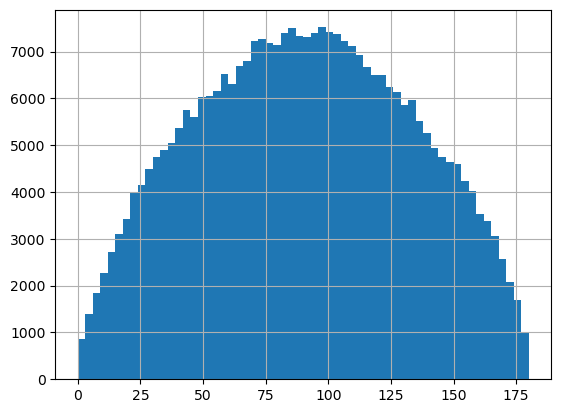

In [111]:
df_grp_zip_year_only.avg_wind_alignment.hist(bins=60)


<AxesSubplot: >

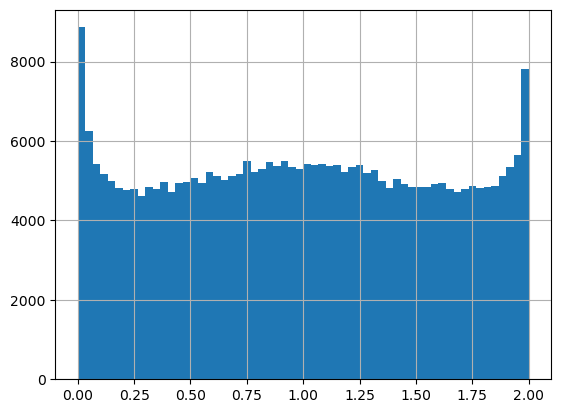

In [126]:
df_grp_zip_year_only.avg_wind_alignment_cosine.hist(bins=60)


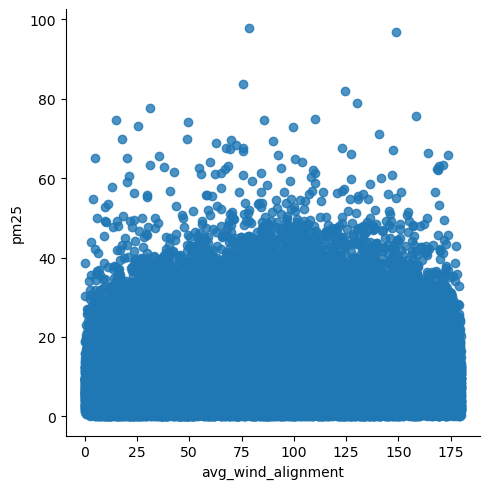

In [122]:
sns.lmplot(data=df_grp_zip_year_only, x='avg_wind_alignment', y='pm25')

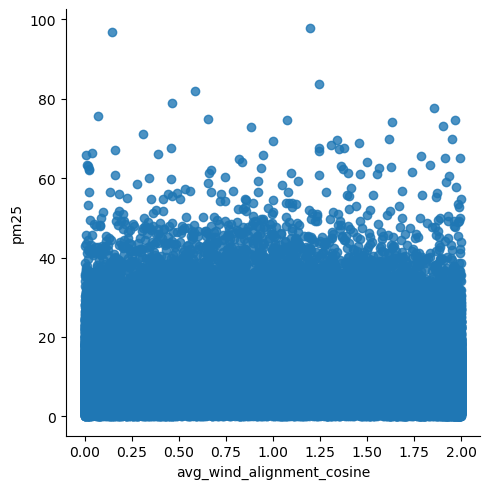

In [121]:
sns.lmplot(data=df_grp_zip_year_only, x='avg_wind_alignment_cosine', y='pm25')

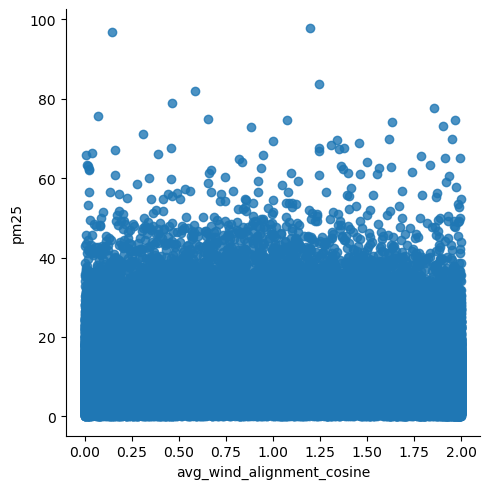

In [131]:
sns.lmplot(data=df_grp_zip_year_only, x='avg_wind_alignment_cosine', y='pm25')

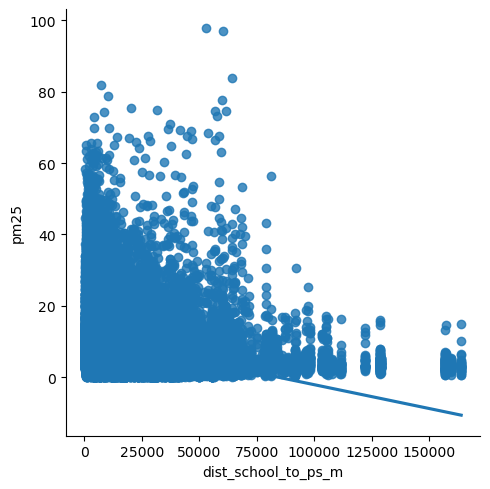

In [120]:
sns.lmplot(data=df_grp_zip_year_only, x='dist_school_to_ps_m', y='pm25')

In [16]:
df_grp_zip_year_only.shape

(312789, 19)

In [17]:
df_grp_zip_year_only.columns

Index(['year_month_date', 'school_zip', 'school_wspd', 'school_elevation_m',
       'ps_elevation_m', 'pop_under19_male', 'pop_under19_female', 'pm25',
       'point_source_pm25_tpy', 'dist_school_to_ps_m', 'angle_to_school',
       'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N',
       'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed',
       'avg_wind_alignment', 'avg_wind_alignment_cosine'],
      dtype='object')

In [18]:
df_grp_zip_year_only.isna().sum()

year_month_date              0
school_zip                   0
school_wspd                  0
school_elevation_m           0
ps_elevation_m               0
pop_under19_male             0
pop_under19_female           0
pm25                         0
point_source_pm25_tpy        0
dist_school_to_ps_m          0
angle_to_school              0
ps_wspd_merge                0
school_wdir_wrt_0N           0
ps_wdir_wrt_0N               0
school_wind_alignment        0
ps_wind_alignment            0
avg_wind_speed               0
avg_wind_alignment           0
avg_wind_alignment_cosine    0
dtype: int64

In [27]:
df[df['school_zip'] == 96311]

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [28]:
df[df['school_zip'] == 97601]

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [29]:
df[df['school_zip'] == 89447]

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
df[df['school_zip'] == 95531]

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30948,2017.0,8100820000000,Del Norte,95531,1990-01-01,2025-01-01,41.772734,-124.205910,0.129044,16.43,2017-09-01,23092.0,12863.0,10229.0,1417.0,807.0,610.0,1198.0,676.0,522.0,1412.0,631.0,781.0,1317.0,625.0,692.0,2739.0,2605.0,2605.0,41.777660,41.857269,-124.143317,38.50,0.859985,10733.478314,-150.996355,41.672,-123.942,0.129044,-146.856996,-146.856996,4.139359,4.139359,0.129044,4.139359,1.997391,2017-01-01,0,2017.0,95531,47675.640724,10856731.0,Del Norte,North Coast,0.0,1
30949,2017.0,8100820106625,Del Norte,95531,2004-07-01,2025-01-01,41.764432,-124.191799,0.129044,7.03,2017-09-01,23092.0,12863.0,10229.0,1417.0,807.0,610.0,1198.0,676.0,522.0,1412.0,631.0,781.0,1317.0,625.0,692.0,2739.0,2605.0,2605.0,41.777660,41.857269,-124.143317,38.50,0.859985,11070.424722,-158.643287,41.672,-123.942,0.129044,-146.856996,-146.856996,11.786291,11.786291,0.129044,11.786291,1.978916,2017-01-01,2,2017.0,95531,47675.640724,10856731.0,Del Norte,North Coast,0.0,1
30951,2017.0,8100820114116,Del Norte,95531,2007-09-10,2018-06-30,41.751307,-124.201170,0.129044,7.97,2017-09-01,23092.0,12863.0,10229.0,1417.0,807.0,610.0,1198.0,676.0,522.0,1412.0,631.0,781.0,1317.0,625.0,692.0,2739.0,2605.0,2605.0,41.777660,41.857269,-124.143317,38.50,0.859985,12713.296926,-157.760162,41.672,-123.942,0.129044,-146.856996,-146.856996,10.903166,10.903166,0.129044,10.903166,1.981948,2017-01-01,1,2017.0,95531,47675.640724,10856731.0,Del Norte,North Coast,0.0,1
30953,2017.0,8100820830042,Del Norte,95531,1990-09-01,2025-01-01,41.764432,-124.191799,0.129044,7.03,2017-09-01,23092.0,12863.0,10229.0,1417.0,807.0,610.0,1198.0,676.0,522.0,1412.0,631.0,781.0,1317.0,625.0,692.0,2739.0,2605.0,2605.0,41.777660,41.857269,-124.143317,38.50,0.859985,11070.424722,-158.643287,41.672,-123.942,0.129044,-146.856996,-146.856996,11.786291,11.786291,0.129044,11.786291,1.978916,2017-01-01,2,2017.0,95531,47675.640724,10856731.0,Del Norte,North Coast,0.0,1
30954,2017.0,8100820830059,Del Norte,95531,2001-08-27,2025-01-01,41.767263,-124.210319,0.129044,19.76,2017-09-01,23092.0,12863.0,10229.0,1417.0,807.0,610.0,1198.0,676.0,522.0,1412.0,631.0,781.0,1317.0,625.0,692.0,2739.0,2605.0,2605.0,41.777660,41.857269,-124.143317,38.50,0.859985,11442.692077,-150.863523,41.672,-123.942,0.129044,-146.856996,-146.856996,4.006527,4.006527,0.129044,4.006527,1.997556,2017-01-01,2,2017.0,95531,47675.640724,10856731.0,Del Norte,North Coast,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981236,2001.0,8618206005391,Del Norte,95531,1980-07-01,2025-01-01,41.755659,-124.206615,0.207171,15.38,2001-09-01,23859.0,13326.0,10533.0,1299.0,649.0,650.0,1570.0,793.0,777.0,1822.0,947.0,875.0,1736.0,914.0,822.0,3303.0,3124.0,3124.0,4.704255,41.754517,-124.174309,8.52,2.440692,2689.807769,-87.286408,41.672,-123.942,0.207171,-129.445816,-129.445816,42.159409

# Modeling

## A decision tree with random search



In [132]:
from math import floor


dt = DecisionTreeRegressor(random_state=0)

distributions = dict(max_depth=list(range(8, 21)),
                        min_samples_split=uniform(loc=0.0001, scale=0.01),
                        min_samples_leaf= list( range( int(0.001*df_grp_zip_year_only.shape[0]), int(0.01*df_grp_zip_year_only.shape[0]) ) ),
                        max_features=[1, 'sqrt', 'log2'])

clf = RandomizedSearchCV(dt, distributions, random_state=0, refit=True, scoring='neg_root_mean_squared_error', n_jobs=-1, n_iter=100)

In [157]:
x_vars = ['school_elevation_m', 'ps_elevation_m', 'pop_under19_male', 
          'pop_under19_female', 'dist_school_to_ps_m',
          'avg_wind_speed', 'avg_wind_alignment_cosine']


X = df_grp_zip_year_only[x_vars]
y = df_grp_zip_year_only['pm25']

In [158]:
search = clf.fit(X, y)

In [159]:
search.best_params_

{'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 398,
 'min_samples_split': 0.0032856895245132367}

In [160]:
results = pd.DataFrame(search.cv_results_).sort_values('rank_test_score')
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,1.204890,0.180365,0.015201,0.001327,18,sqrt,398,0.003286,"{'max_depth': 18, 'max_features': 'sqrt', 'min...",-6.853934,-4.279104,-5.080094,-4.434834,-5.212621,-5.172117,0.914295,1
16,1.164684,0.168431,0.021306,0.004769,15,log2,403,0.007607,"{'max_depth': 15, 'max_features': 'log2', 'min...",-6.828023,-4.303715,-5.121234,-4.471156,-5.216217,-5.188069,0.893393,2
1,1.059948,0.044257,0.016302,0.004483,15,sqrt,589,0.003944,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",-6.853855,-4.315900,-5.106451,-4.477579,-5.200883,-5.190933,0.899678,3
47,1.133725,0.131453,0.017505,0.007120,16,sqrt,336,0.004414,"{'max_depth': 16, 'max_features': 'sqrt', 'min...",-6.855348,-4.320291,-5.104142,-4.490178,-5.231115,-5.200215,0.897560,4
45,1.143267,0.054909,0.016601,0.002335,16,log2,519,0.003083,"{'max_depth': 16, 'max_features': 'log2', 'min...",-6.858724,-4.332319,-5.101860,-4.478675,-5.241023,-5.202520,0.898424,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.789417,0.122386,0.019866,0.008483,11,1,1746,0.005823,"{'max_depth': 11, 'max_features': 1, 'min_samp...",-7.148381,-4.641624,-5.231895,-4.620877,-5.308368,-5.390229,0.924681,96
61,0.524257,0.066900,0.012805,0.003356,9,1,2651,0.006315,"{'max_depth': 9, 'max_features': 1, 'min_sampl...",-7.182913,-4.687677,-5.203109,-4.605947,-5.278623,-5.391654,0.934864,97
76,1.474634,0.090922,0.040961,0.011053,15,1,3075,0.002255,"{'max_depth': 15, 'max_features': 1, 'min_samp...",-7.162368,-4.684400,-5.218320,-4.680352,-5.292756,-5.407639,0.914345,98
9,0.559616,0.044257,0.018997,0.008651,15,1,3057,0.009547,"{'max_depth': 15, 'max_features': 1, 'min_samp...",-7.161008,-4.684744,-5.217735,-4.680119,-5.294808,-5.407683,0.913779,99


In [161]:
search.score(X, y)

-4.972494862661221

In [162]:
r2_val = r2_score(y, search.predict(X))
print(f"R^2 on training: {r2_val}")

R^2 on training: 0.30975720633445736


In [139]:
rms = mean_squared_error(y, search.predict(X), squared=False)
print(f"RMSE on training: {rms}")

RMSE on training: 4.972494862661221


<AxesSubplot: >

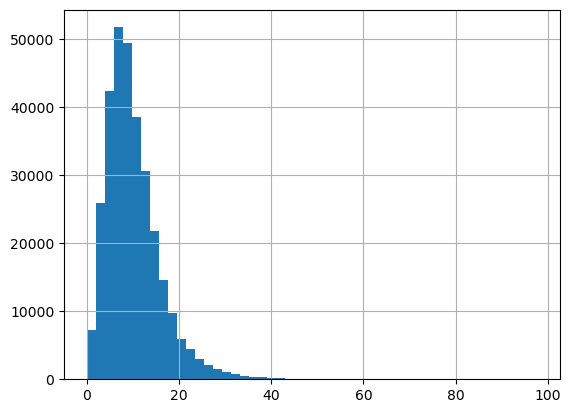

In [156]:
df_grp_zip_year_only.pm25.hist(bins=50)

<AxesSubplot: >

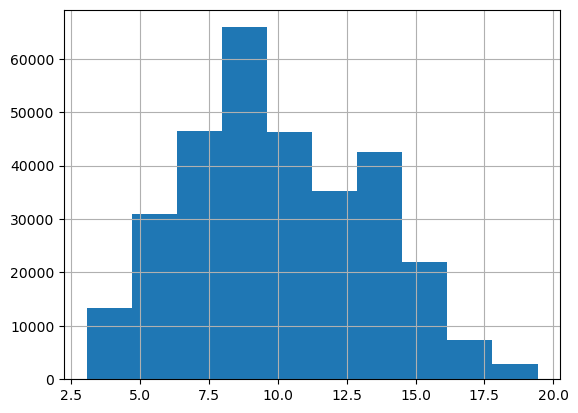

In [149]:
pm25_pred = pd.Series(search.predict(X))
pm25_pred.hist()

### A very baseline linear model

<AxesSubplot: >

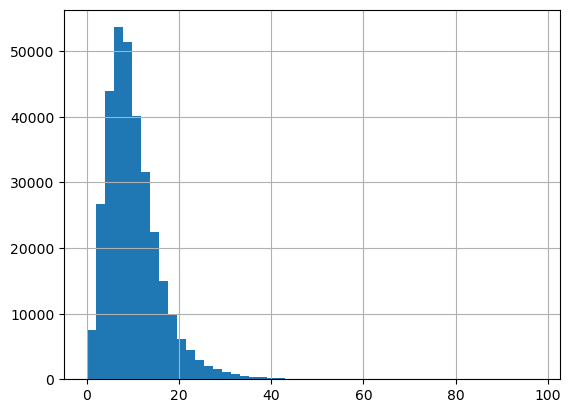

In [72]:
df_grp.pm25.hist(bins=50)

In [51]:
df_grp['avg_wind_alignment_cosine_squared'] = df_grp['avg_wind_alignment_cosine']**2

display(df_grp[['avg_wind_alignment_cosine', 'avg_wind_alignment_cosine_squared']])

,avg_wind_alignment_cosine,avg_wind_alignment_cosine_squared
0,0.337179,0.113690
1,0.113934,0.012981
2,1.997562,3.990254
3,0.844719,0.713550
4,1.527236,2.332450
...,...,...
323357,0.614988,0.378210
323358,1.266354,1.603652
323359,0.033526,0.001124
323360,1.677859,2.815210


In [59]:
df_grp_zip_year_only['avg_wind_alignment_cosine_squared'] = (df_grp_zip_year_only['avg_wind_alignment_cosine']/2)**2

display(df_grp_zip_year_only[['avg_wind_alignment_cosine', 'avg_wind_alignment_cosine_squared']])

,avg_wind_alignment_cosine,avg_wind_alignment_cosine_squared
0,1.124995,0.316403
1,0.879819,0.193520
2,0.869845,0.189158
3,1.160977,0.336967
4,0.923498,0.213212
...,...,...
312784,0.203923,0.010396
312785,0.450580,0.050756
312786,1.594435,0.635556
312787,1.677660,0.703636


In [73]:
x_vars = ['school_elevation_m', 'ps_elevation_m', 'pop_under19_male', 
          'pop_under19_female', 'dist_school_to_ps_m',
          'avg_wind_speed', 'avg_wind_alignment_cosine']

X = df_grp_zip_year_only[x_vars]
y = df_grp_zip_year_only['pm25']

In [74]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     9969.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:07:53   Log-Likelihood:            -9.7200e+05
No. Observations:              312789   AIC:                         1.944e+06
Df Residuals:                  312781   BIC:                         1.944e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

5.411868489996161


In [68]:
pm25_pred = est.predict(X)

<AxesSubplot: >

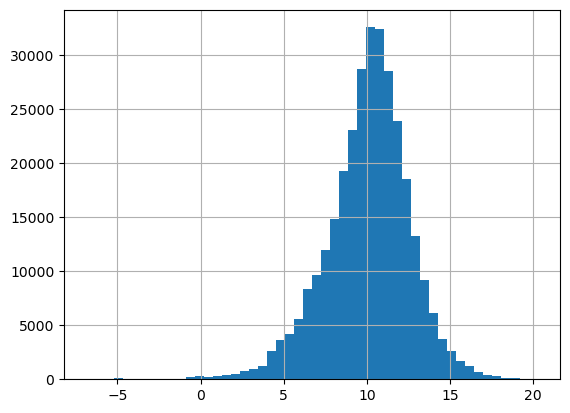

In [71]:
pm25_pred.hist(bins=50)